# Credit Card Fraud

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

In [2]:
# Load Data

In [3]:
data = pd.read_csv('creditcard.csv')

In [7]:
"Shape of data: ",data.shape

('Shape of data: ', (284807, 31))

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
data = data.sample(frac = 0.2,random_state = 42)
data.shape

(56961, 31)

In [17]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

In [18]:
print("Fraud: ",len(fraud))
print("Valid: ",len(valid))

Fraud:  98
Valid:  56863


In [20]:
# check outliers occurance

In [22]:
outlier = len(fraud)/len(valid)
outlier

0.0017234405500940859

In [23]:
# Visualise Data

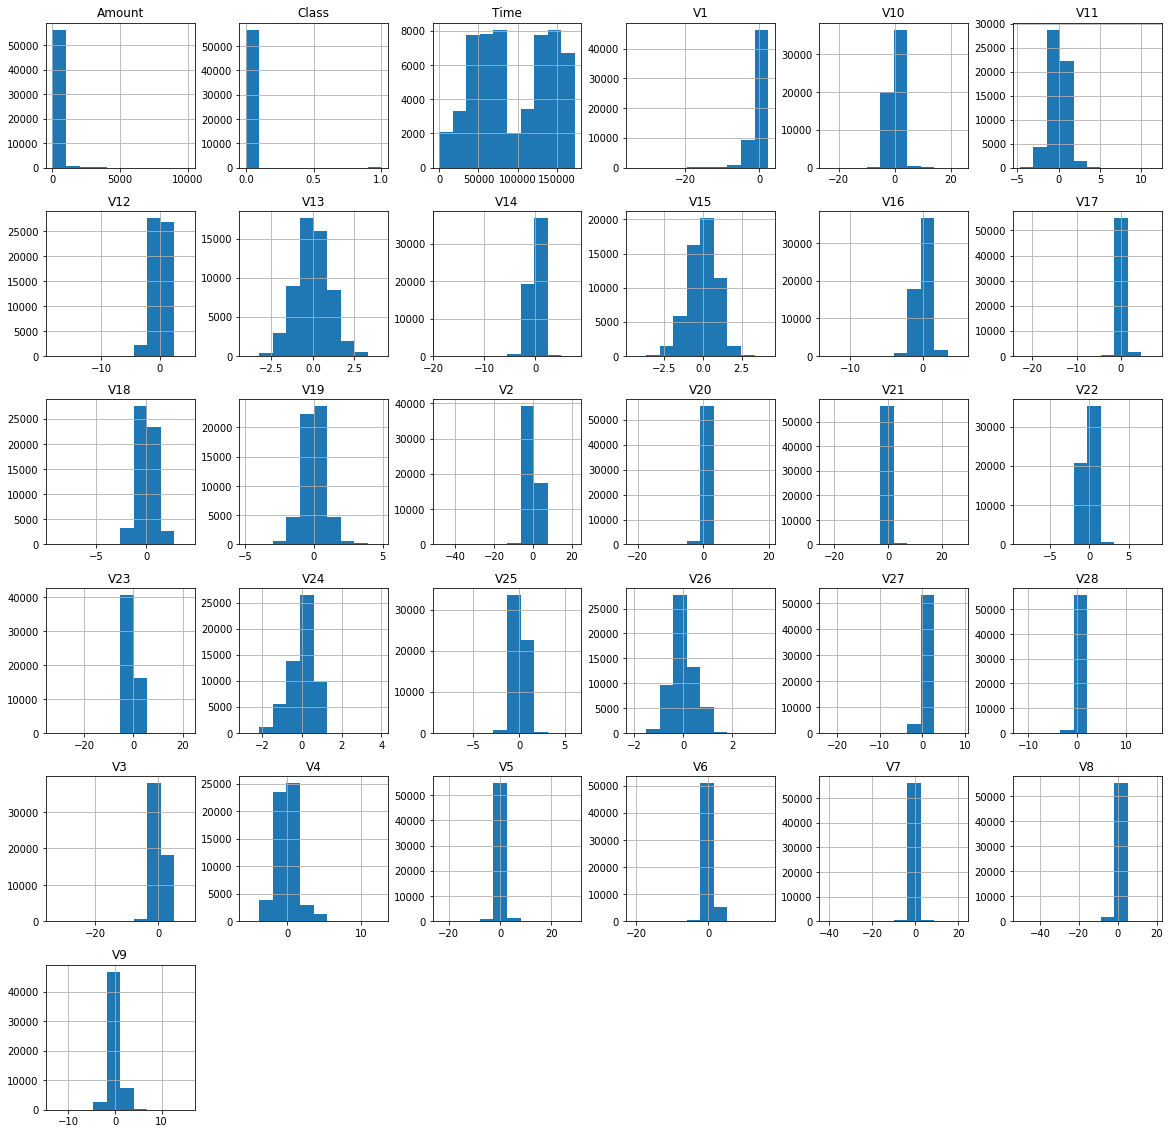

In [27]:
data.hist(figsize = (20,20))
plt.show()

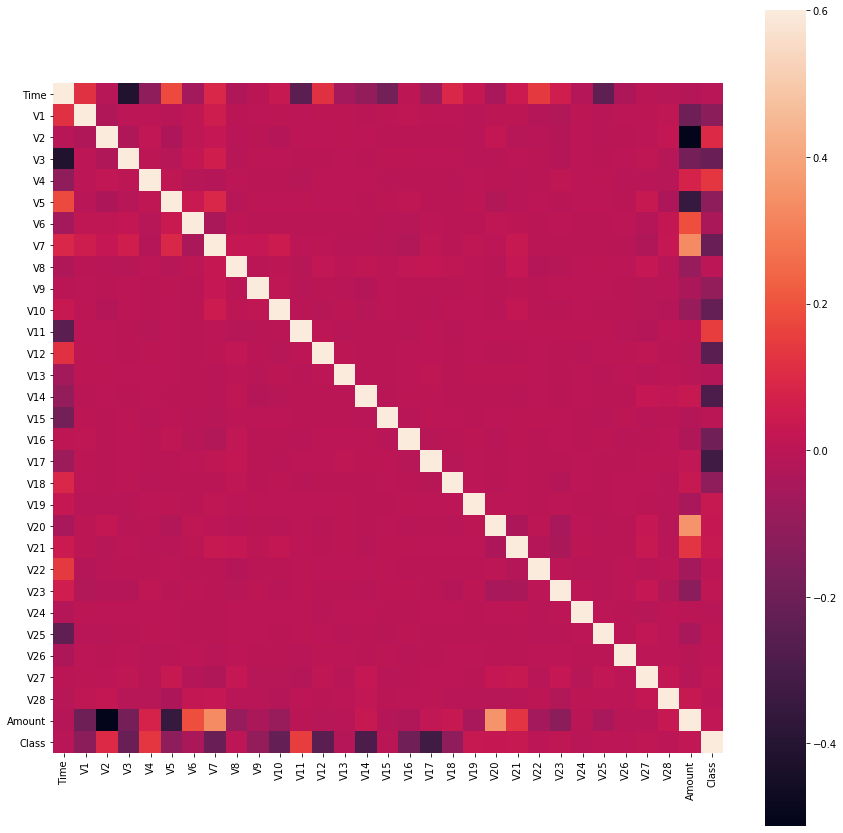

In [30]:
corr = data.corr()
figure = plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax= .6, square = True)
plt.show()

In [32]:
len(corr['Class'])

31

In [33]:
# Select Model

In [37]:
column = corr.keys()
col_store = []
for i in range(len(corr)):
    if abs(corr['Class'][i] > 0.01):
           col_store.append(column[i])

In [38]:
print(col_store)

['V2', 'V4', 'V11', 'V19', 'V20', 'V21', 'V23', 'Amount', 'Class']


In [39]:
len(col_store)

9

In [41]:
feature = data.drop("Class",axis=1) #remove class
target = data["Class"]

In [42]:
print("Train Set: ", feature.shape)
print("Target Set: ", target.shape)

Train Set:  (56961, 30)
Target Set:  (56961,)


In [43]:
# Lets train the model LOF, Isolation Forest

In [46]:
# define outlier detection tools to be compared
classifiers = {
    "IF": IsolationForest(max_samples = len(feature),
                                        contamination = outlier,
                                        random_state = 1),
    "LOF": LocalOutlierFactor(
        n_neighbors = 20,
        contamination = outlier)}

In [51]:
n_of_outliers = len(fraud)

# Fit the model
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the dataframe and tag outliers
    if clf_name == "LOF":
        
        y_pred = clf.fit_predict(feature)
        scores_pred = clf.negative_outlier_factor_
        
    else:
        
        # train/fit classifier on our features
        clf.fit(feature)
        # generate predictions 
        scores_pred = clf.decision_function(feature)
        y_pred = clf.predict(feature)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud.
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != target).sum()
    
    # Run classification metrics
    print('Accuracy: {0}%\n'.format(accuracy_score(target, y_pred)*100))

Accuracy: 99.76650690823547%

Accuracy: 99.65766050455575%

